In [1]:
%matplotlib inline

import os
import sys
import timeit
import urllib
import gzip
import pickle
from functools import reduce

import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.linear_model import Ridge
import pandas as pd

sys.path.append(os.path.abspath('..\\..\\..\\dataset'))

import dataset as ds
from dataset.opensets import MNIST
from dataset import B, V, C, F
from dataset import action
from dataset.models.tf import VGG7, VGG16, VGG19
from dataset.models.tf import VNet
from dataset.models.tf import UNet
from dataset.models.tf import SqueezeNet
from dataset.models.tf import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
from dataset.models.tf import MobileNet
from dataset.models.tf import LinkNet
from dataset.models.tf import Inception_v1, Inception_v3, Inception_v4
from dataset.models.tf import FCN8, FCN16, FCN32
from dataset.models.tf import DenseNet121, DenseNet169, DenseNet201, DenseNet264
from dataset import Pipeline

from MNISTBatch import AugmentedMNISTBatch

In [2]:
mnist_set = MNIST(batch_class = AugmentedMNISTBatch)

ExtractingExtractingExtractingExtracting    C:\Users\GREGOR~1\AppData\Local\Temp\train-images-idx3-ubyte.gzC:\Users\GREGOR~1\AppData\Local\Temp\train-labels-idx1-ubyte.gzC:\Users\GREGOR~1\AppData\Local\Temp\t10k-labels-idx1-ubyte.gz
C:\Users\GREGOR~1\AppData\Local\Temp\t10k-images-idx3-ubyte.gz




In [3]:
def show_img(axis, image, title):
    axis.imshow(image, cmap=plt.get_cmap('Greys'))
    axis.set_title(title, fontsize=12)
    axis.tick_params(bottom='off', labelbottom='off', left='off', labelleft='off')

def plot_examples(title, action, **params):
    num_plots = 2 * len(list(params.values())[0])
    f, a = plt.subplots(1, num_plots, figsize=(16, 3))
    for i in range(num_plots // 2):
        batch = mnist_set.train.next_batch(1)
        current_params = {k : v[i] for k, v in params.items()}
        show_img(a[i*2], batch.images[0].squeeze(), 'original')
        action(batch, **current_params)
        title_action = '\n'.join((str(k)+'=' + str(v) for k, v in current_params.items()))        
        show_img(a[i*2+1], batch.images[0].squeeze(), title_action)
    plt.suptitle(title, fontsize=18)

# Crop

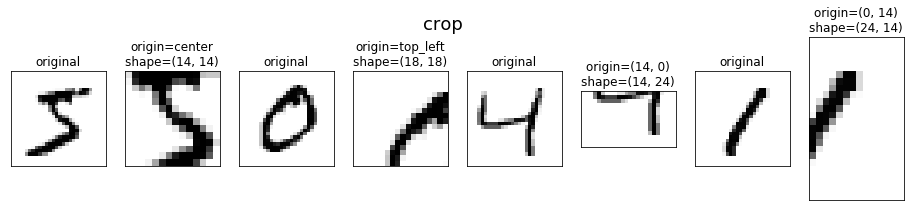

In [4]:
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])

# Random crop

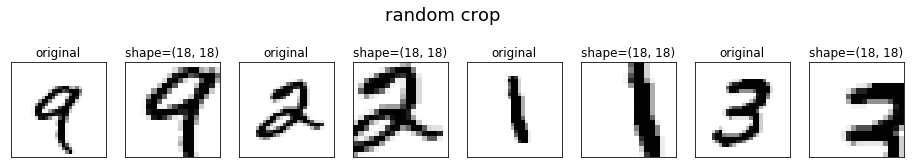

In [5]:
plot_examples(title = 'random crop',
              action = lambda batch, **params: batch.random_crop(**params),
              shape = [(18, 18), (18, 18), (18, 18), (18, 18)])

# Flip

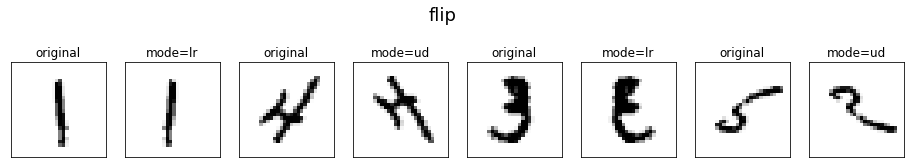

In [6]:
plot_examples(title = 'flip',
              action = lambda batch, **params: batch.flip(**params),
              mode = ['lr', 'ud', 'lr', 'ud'])

# Random flip

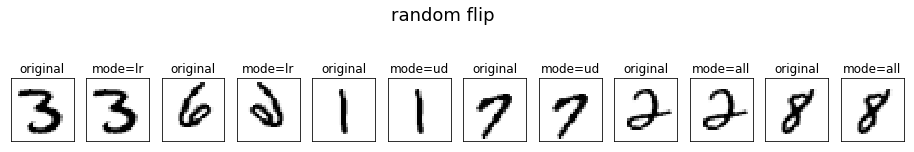

In [7]:
plot_examples(title = 'random flip',
              action = lambda batch, **params: batch.random_flip(**params),
              mode = ['lr', 'lr', 'ud', 'ud', 'all', 'all'])

# Rotate